In [277]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20,10) # setting the default figure size
 

In [278]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [279]:
df.head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [281]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [282]:
df.groupby("area_type")["area_type"].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [283]:
df2=df.drop(["area_type","availability","society","balcony"],axis=1)

In [284]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [285]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [286]:
df2.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [287]:
# filling na values with median
df2["bath"].fillna(df2["bath"].median(),inplace=True) 
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [288]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [289]:
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [290]:
df2.shape

(13303, 5)

In [291]:
df2["bhk"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))


In [292]:
df3=df2.drop("size",axis=1)

In [293]:
df3

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [294]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [295]:
df3[df3["bhk"]>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [296]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False
    return True
        

In [297]:
df3[~df3["total_sqft"].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2


In [298]:
def convert_sqrt(x):
    a=x.split("-")
    if len(a)==2:
        return (float(a[0])+float(a[1])/2)
    try:
        return float(x)
    except:
        return None
    
    

In [299]:
df4=df3.copy(deep=True)


In [300]:
df4["total_sqft"]=df4["total_sqft"].apply(convert_sqrt)
df4.shape

(13303, 5)

In [301]:
df4["total_sqft"].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [302]:
df4["location"]=df4["location"].apply(lambda x: x.strip())# removed all the trailing and leading whitespaces.

In [303]:
df4

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [304]:
l_s=df4.groupby("location")["location"].count().sort_values(ascending=False) # Location constitutes more importance in recognizing the price
l_s_10=l_s[l_s<=10]



In [305]:
l_s_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [306]:
len(l_s_10)

1052

In [307]:
df4.location=df4.location.apply(lambda x: "Other_loc" if x in l_s_10 else x)

In [308]:
len(df4["location"].unique())

242

In [309]:
df4[df4["location"]=="Other_loc"]

,location,total_sqft,bath,price,bhk
9,Other_loc,1020.0,6.0,370.00,6
18,Other_loc,2770.0,4.0,290.00,3
19,Other_loc,1100.0,2.0,48.00,2
25,Other_loc,1250.0,3.0,56.00,3
42,Other_loc,600.0,1.0,38.00,1
...,...,...,...,...,...
13291,Other_loc,812.0,1.0,26.00,1
13292,Other_loc,1440.0,2.0,63.93,3
13302,Other_loc,1075.0,2.0,48.00,2
13306,Other_loc,1200.0,5.0,325.00,4


In [310]:
df4["price_sqft"]=df4["price"]*100000/df4["total_sqft"]

In [311]:
df4[df4.total_sqft/df4.bhk<300]

,location,total_sqft,bath,price,bhk,price_sqft
9,Other_loc,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other_loc,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,Other_loc,1400.0,7.0,218.0,7,15571.428571
13279,Other_loc,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [312]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]

In [313]:
df5.shape

(12559, 6)

In [314]:
col=list(df5.columns)
col

['location', 'total_sqft', 'bath', 'price', 'bhk', 'price_sqft']

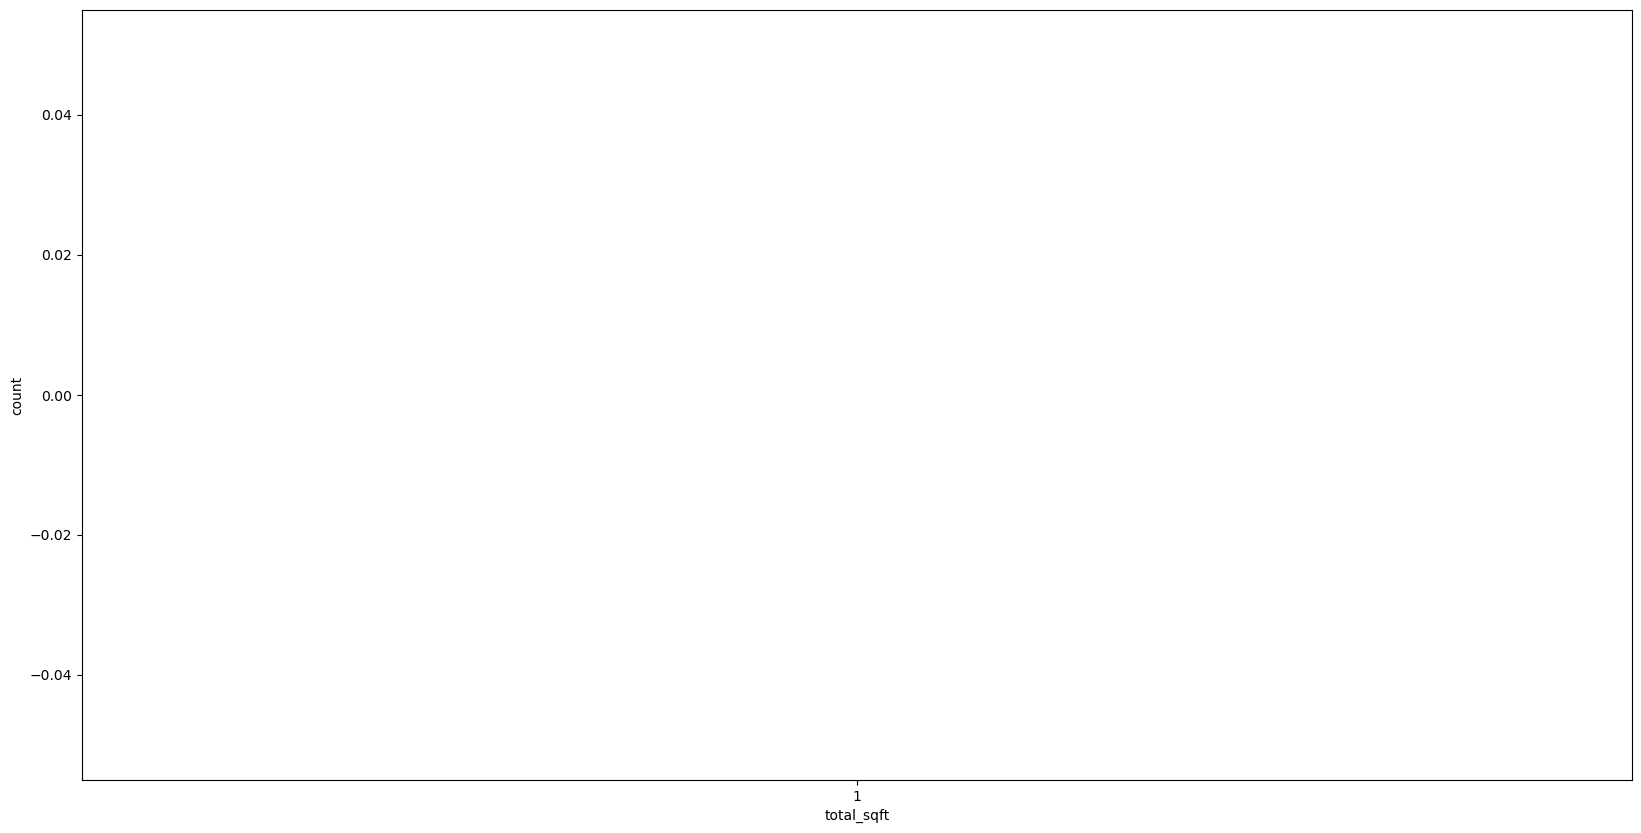

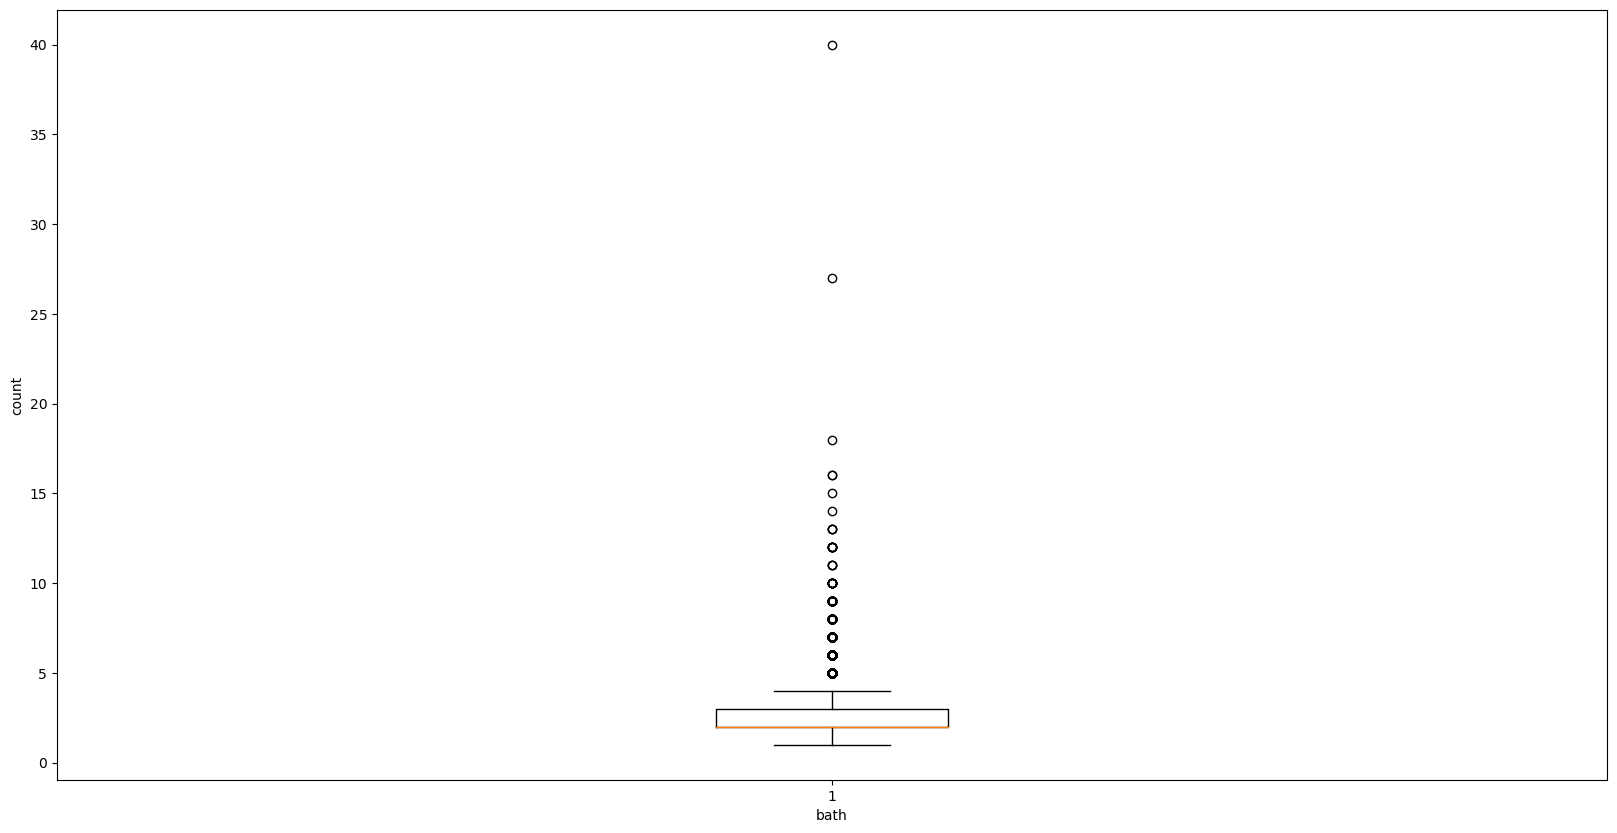

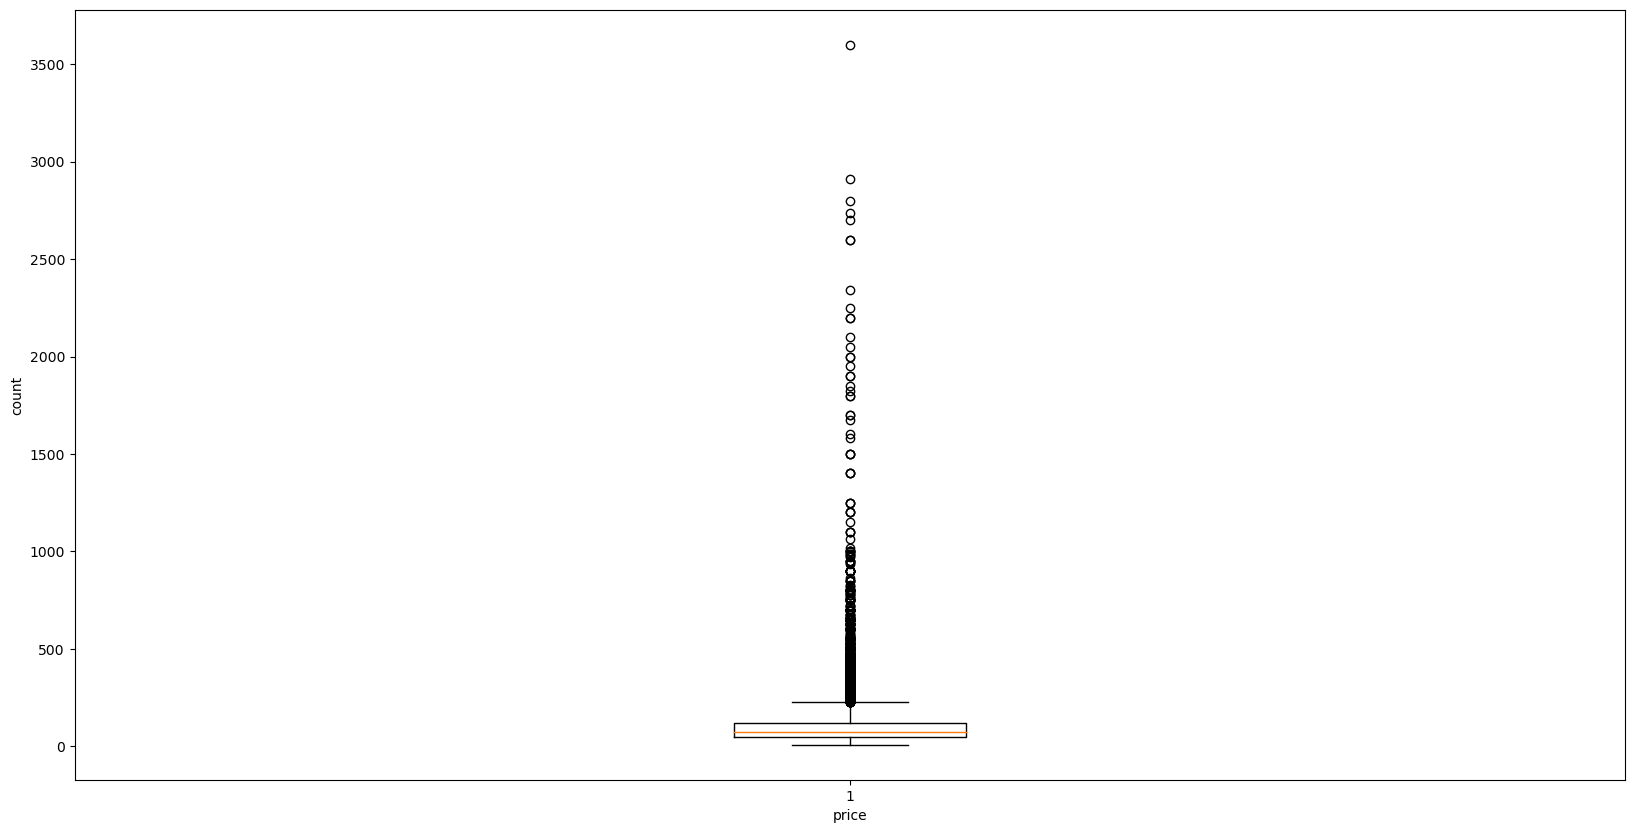

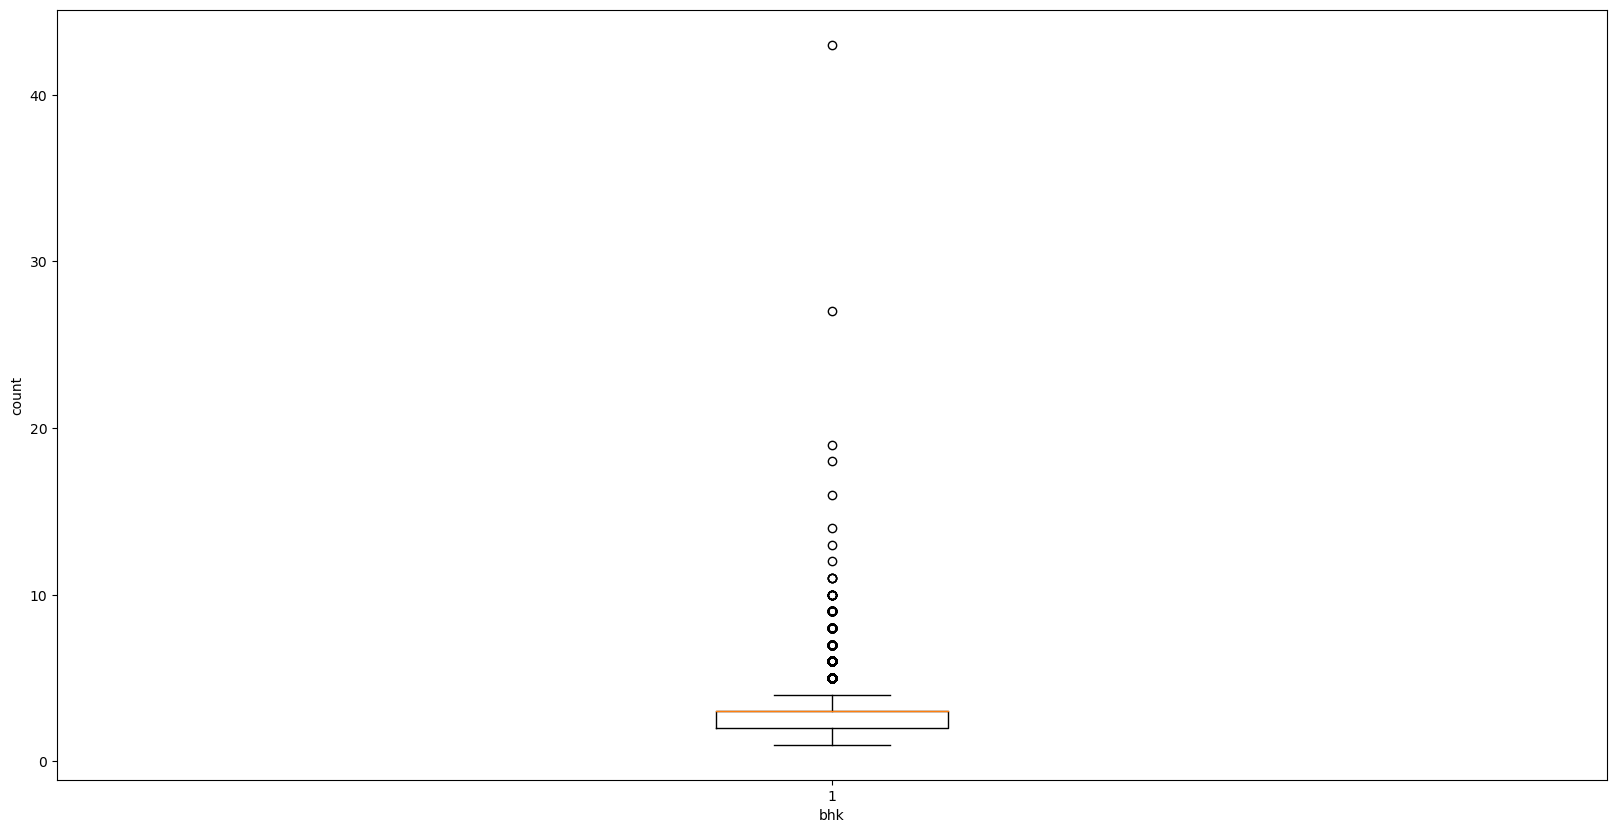

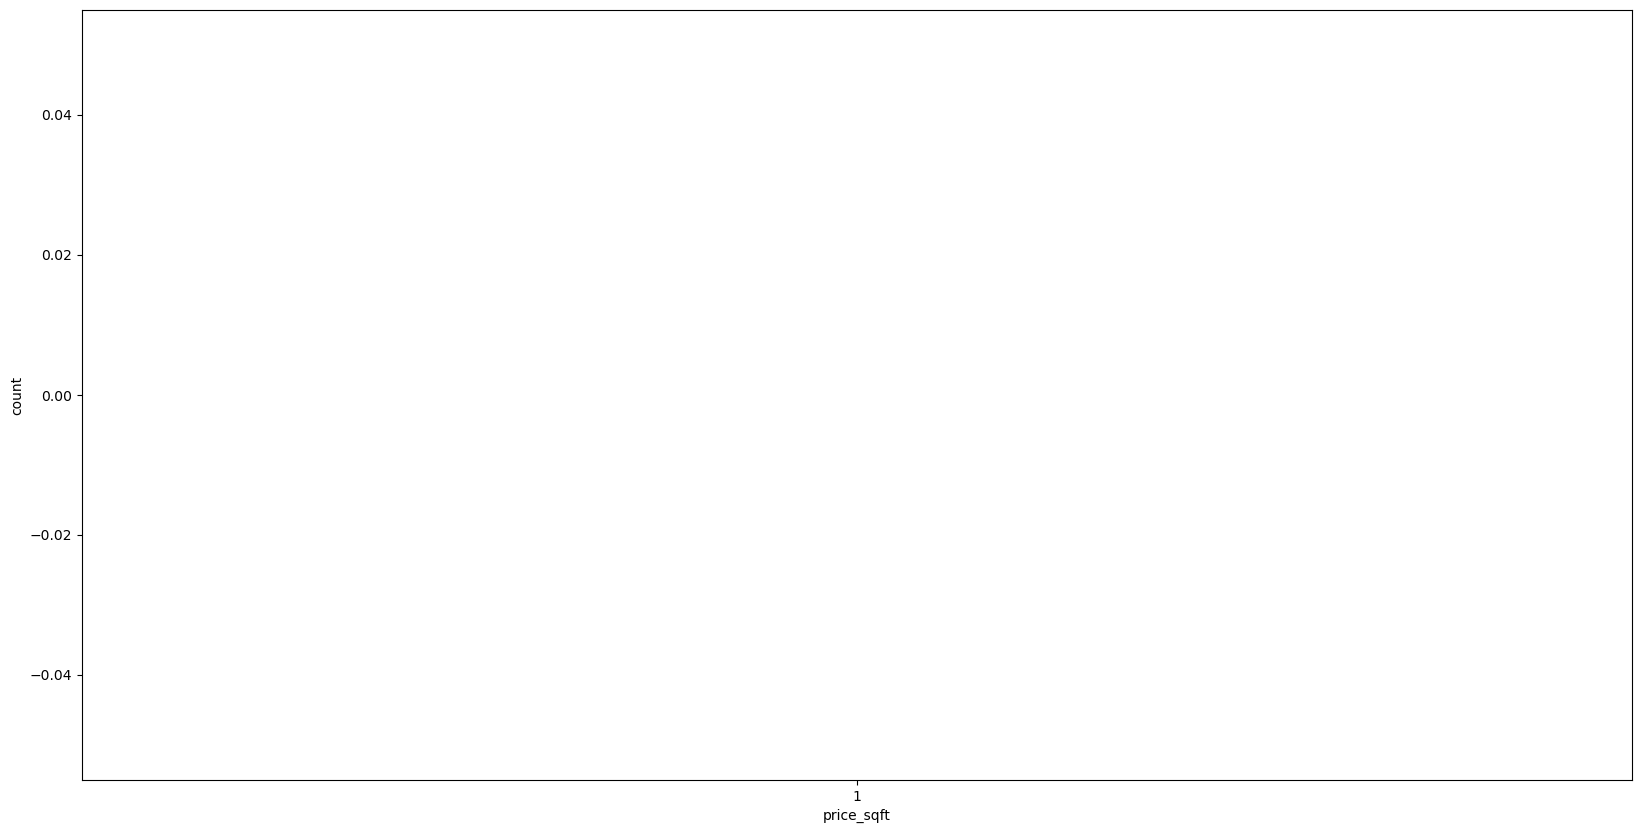

In [315]:
for col_name in col:
    if(df5[col_name].dtypes=="int64" or df4[col_name].dtypes=="float64"):
        plt.boxplot(df4[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()
        

In [316]:
import matplotlib.pyplot as plt

In [317]:
#Q1 = df5.bhk.quantile(0.25)
#Q3 = df5.bhk.quantile(0.75)
#IQR = Q3 - Q1
#df5 = df5[(df4.bhk >= Q1 - 1.5*IQR) & (df5.bhk <= Q3 + 1.5*IQR)]


In [318]:
#Q1 = df5.total_sqft.quantile(0.25)
#Q3 = df5.total_sqft.quantile(0.75)
#IQR = Q3 - Q1
#df5 = df5[(df5.total_sqft >= Q1 - 1.5*IQR) & (df5.total_sqft <= Q3 + 1.5*IQR)]

In [319]:
df5

,location,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Other_loc,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [320]:
df5.location.value_counts()

Other_loc               2570
Whitefield               539
Sarjapur  Road           393
Electronic City          295
Kanakpura Road           271
                        ... 
Banjara Layout             8
Vishwapriya Layout         7
5th Block Hbr Layout       7
Vishveshwarya Layout       7
Marsur                     5
Name: location, Length: 242, dtype: int64

In [321]:
location_group=df5.groupby("location")["location"].count().sort_values(ascending=False) # Location constitutes more importance in recognizing the price
location_group10=location_group[location_group<=10]


In [322]:
df5.location=df5.location.apply(lambda x: "Other_loc" if x in location_group10 else x)

C:\Users\Anuj\AppData\Local\Temp\ipykernel_5304\969039716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location=df5.location.apply(lambda x: "Other_loc" if x in location_group10 else x)


In [323]:
df5.location.value_counts()

Other_loc                    2725
Whitefield                    539
Sarjapur  Road                393
Electronic City               295
Kanakpura Road                271
                             ... 
2nd Phase Judicial Layout      11
LB Shastri Nagar               11
Kammanahalli                   11
Banashankari Stage VI          11
Narayanapura                   11
Name: location, Length: 224, dtype: int64

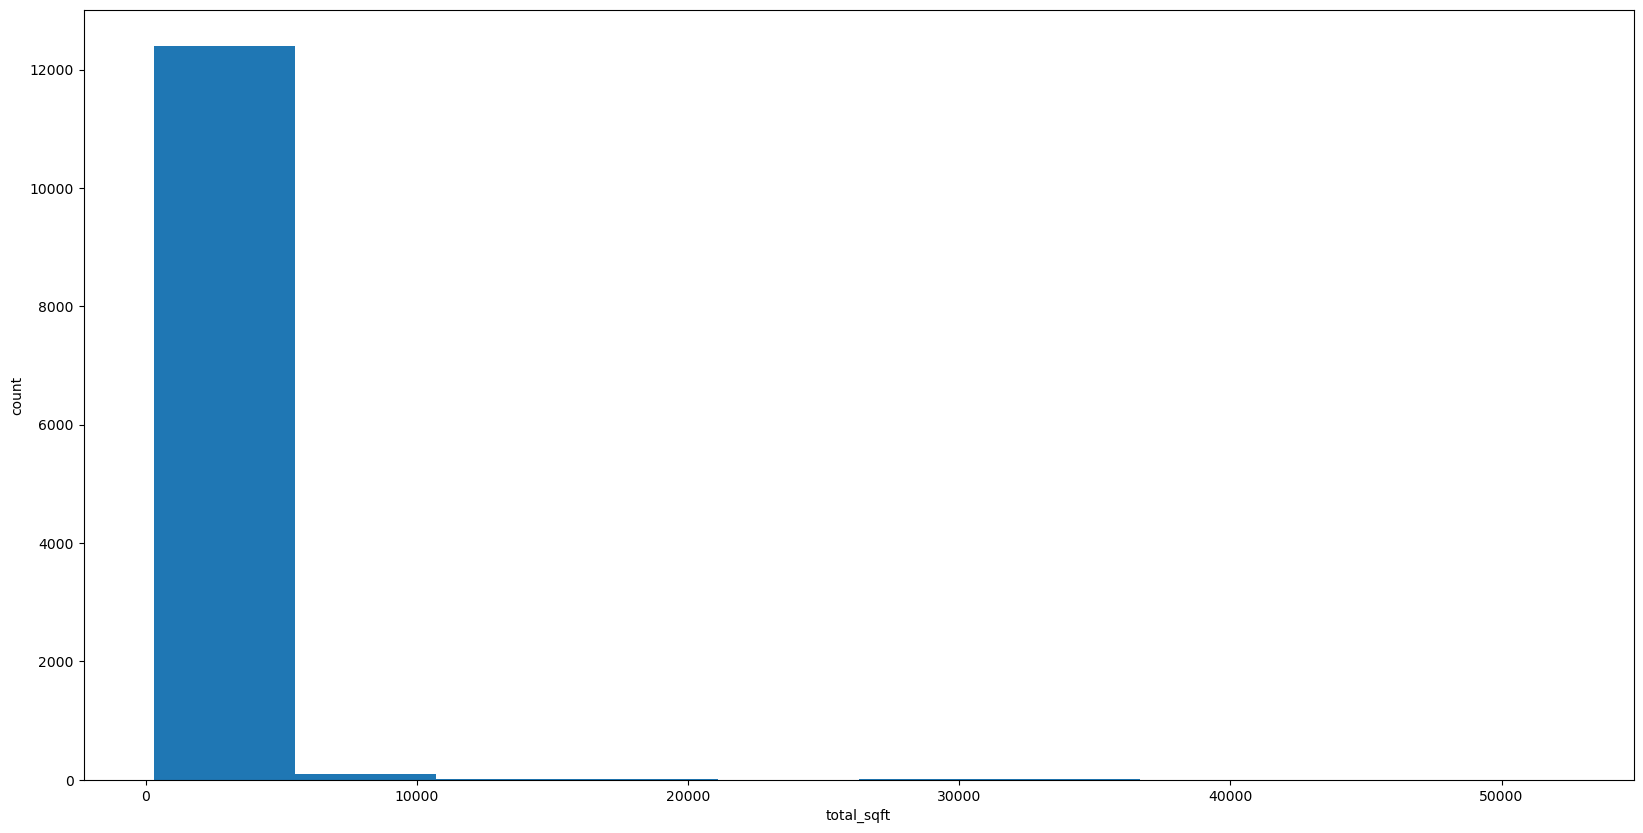

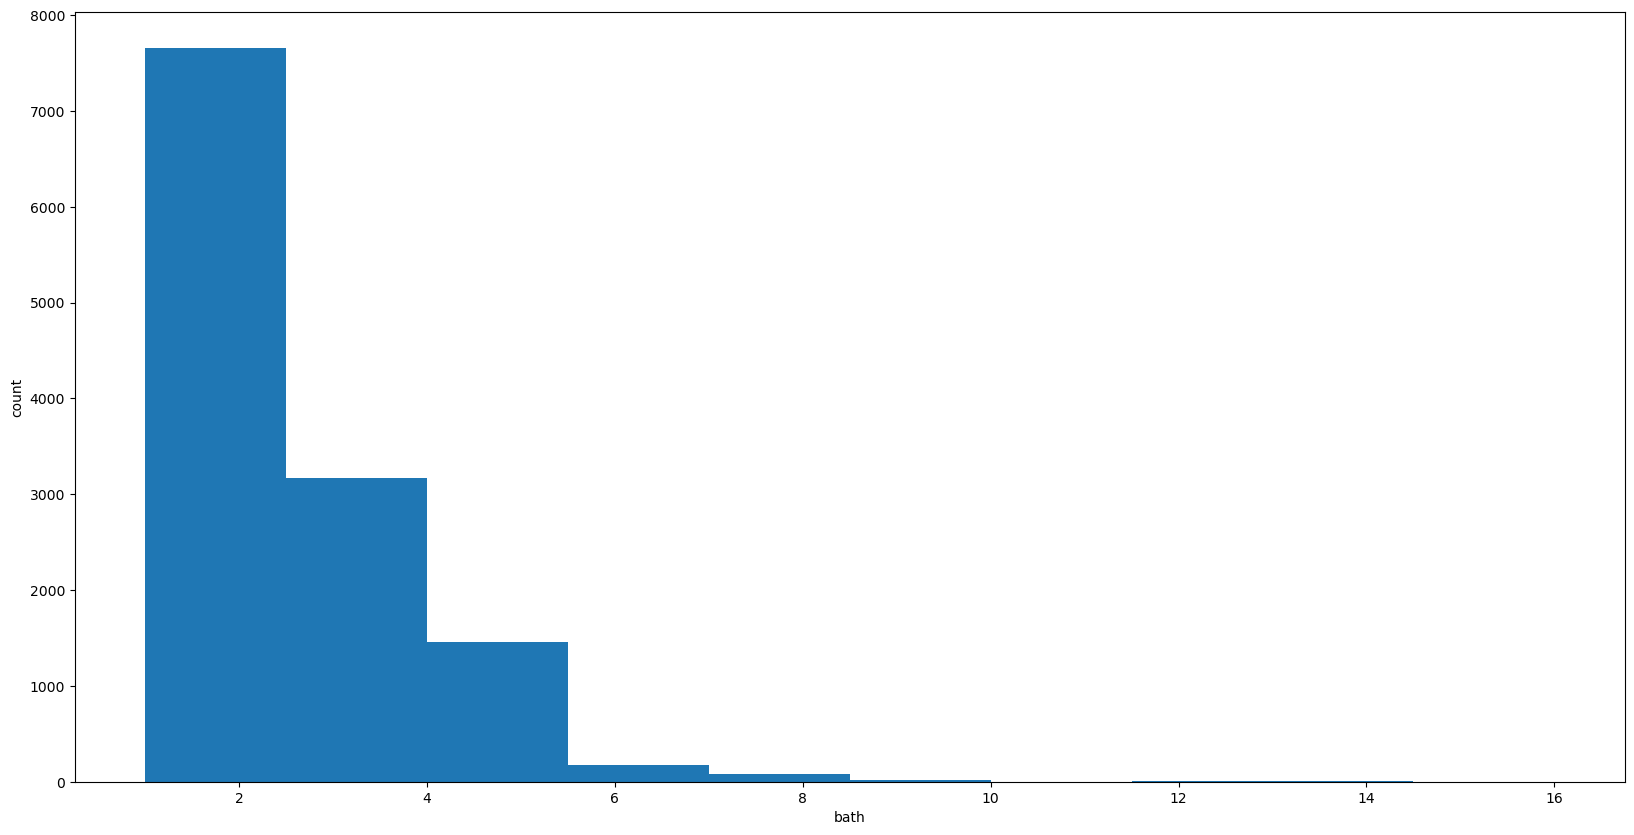

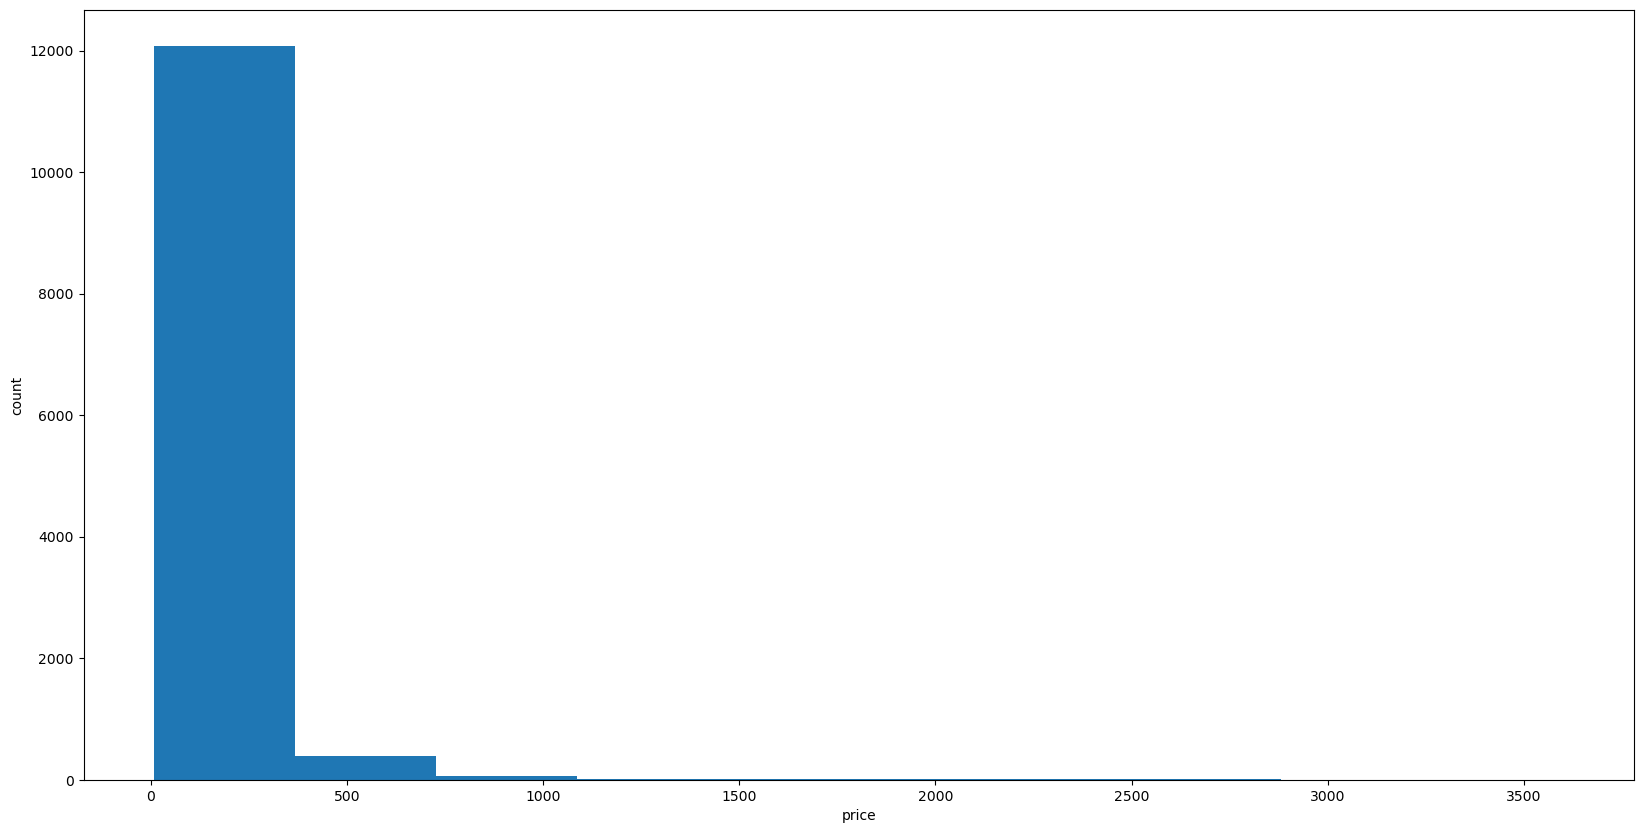

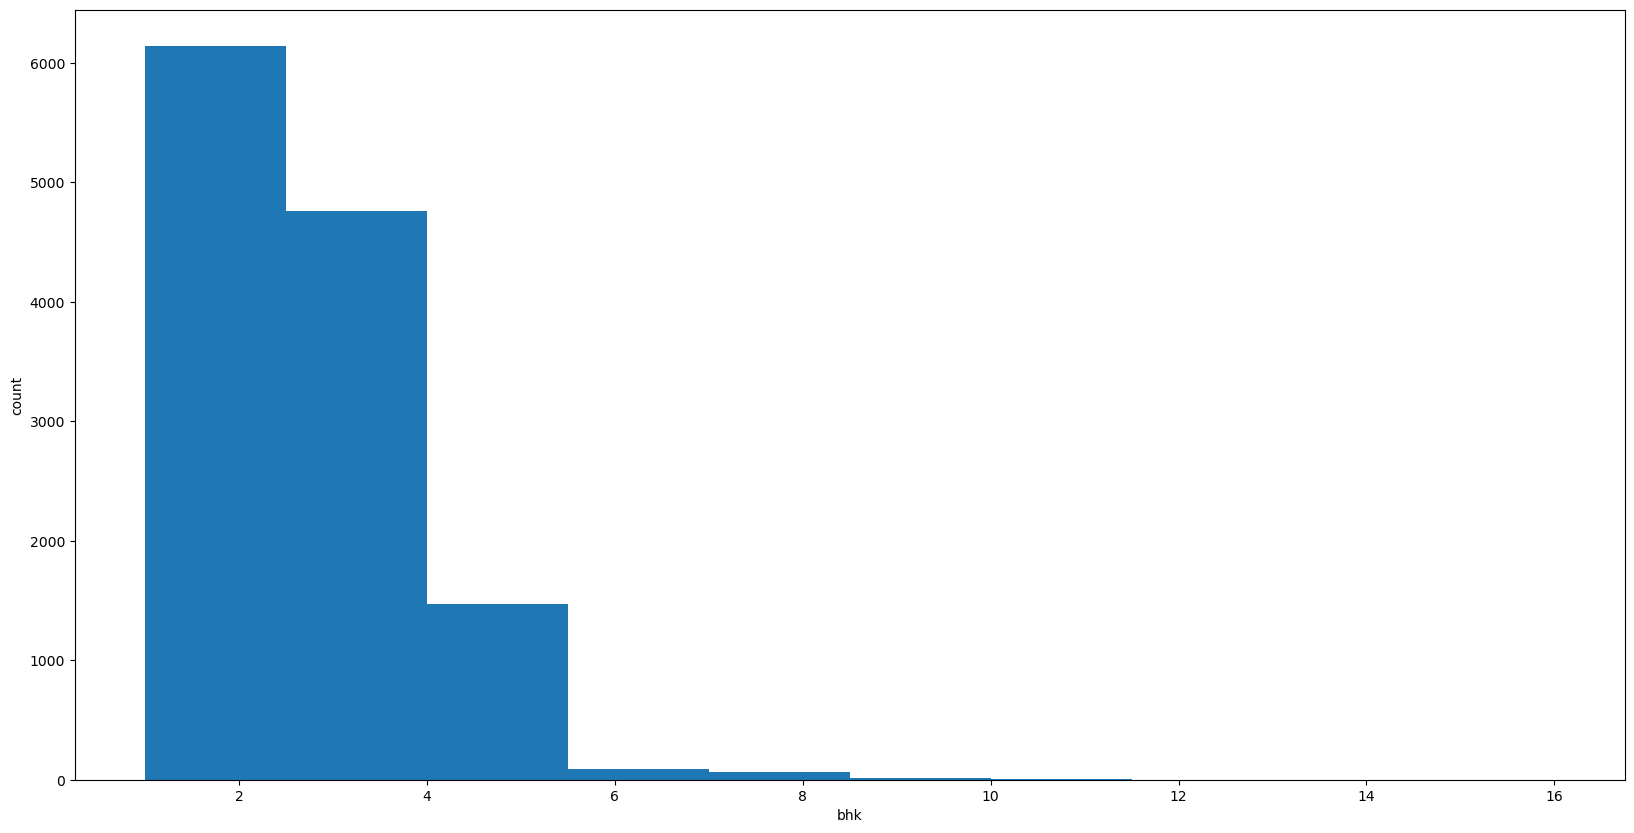

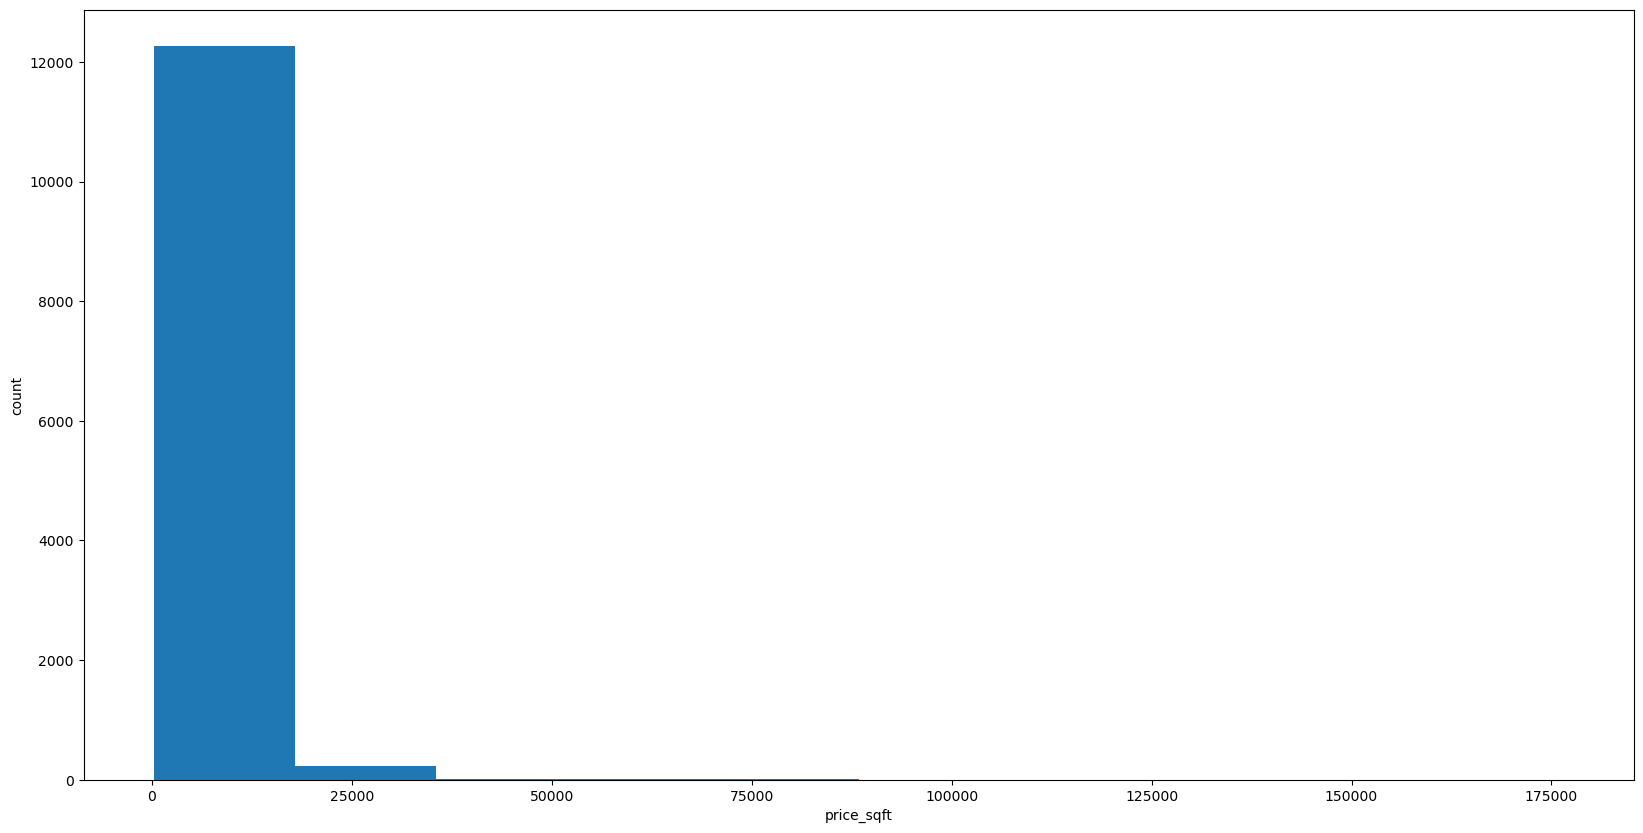

In [324]:
for col_name in col:
    if(df5[col_name].dtypes=="int64" or df5[col_name].dtypes=="float64"):
        plt.hist(df5[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()
        

In [325]:
df5

,location,total_sqft,bath,price,bhk,price_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Other_loc,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [326]:
def remove_outliers(df):
    df_1=pd.DataFrame()
    for key,df_2 in df.groupby('location'):
        mean=np.mean(df_2.price_sqft)
        std=np.std(df_2.price_sqft)
        df_3=df_2[(df_2.price_sqft>(mean-std))&(df_2.price_sqft<=(mean+std))]
        df_1=pd.concat([df_1,df_3],ignore_index=True)
    return df_1

In [384]:
df5=remove_outliers(df5)

In [386]:
df5

,location,total_sqft,bath,price,bhk,price_sqft
0,1st Phase JP Nagar,2825.0,4.0,250.00,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,167.00,3,8906.666667
2,1st Phase JP Nagar,1500.0,5.0,85.00,5,5666.666667
3,1st Phase JP Nagar,2065.0,4.0,210.00,3,10169.491525
4,1st Phase JP Nagar,2024.0,3.0,157.00,3,7756.916996
...,...,...,...,...,...,...
10288,Yeshwanthpur,1676.0,3.0,92.13,3,5497.016706
10289,Yeshwanthpur,2503.0,3.0,138.00,3,5513.383939
10290,Yeshwanthpur,1855.0,3.0,135.00,3,7277.628032
10291,Yeshwanthpur,1876.0,3.0,160.00,3,8528.784648


In [387]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df7.shape

(7276, 6)

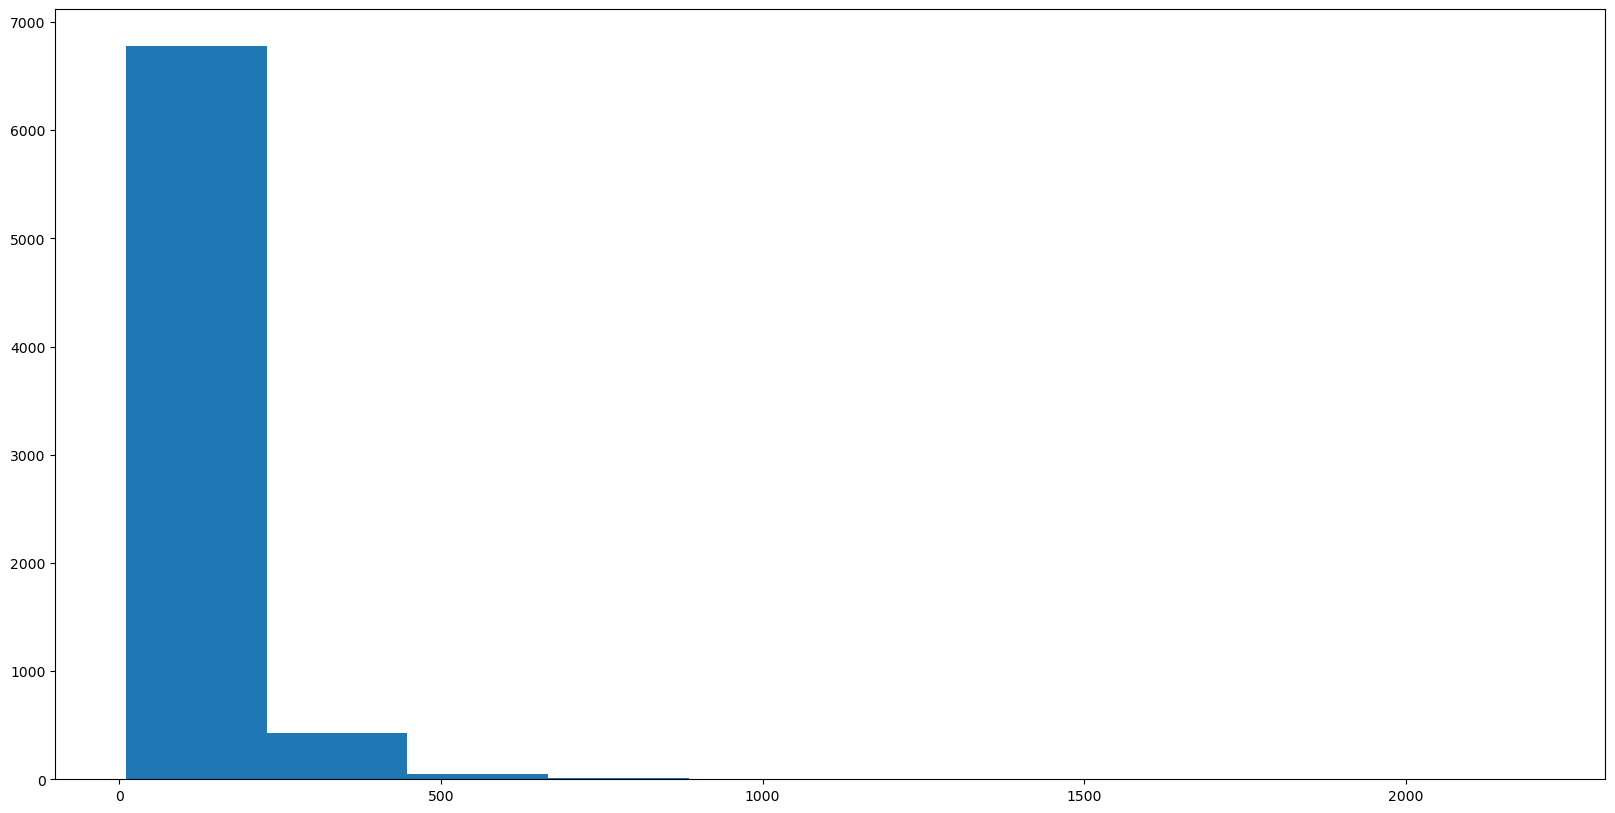

In [389]:
plt.hist(df7.price)
plt.show()

In [329]:
"""bhk2=df5[(df5["location"]=="Rajaji Nagar")&(df5["bhk"]==2)]
bhk2
bhk3=df5[(df5["location"]=="Rajaji Nagar")&(df5["bhk"]==3)]
plt.scatter(bhk2.total_sqft,bhk2.price)
plt.scatter(bhk3.total_sqft,bhk3.price)
plt.show()"""

'bhk2=df5[(df5["location"]=="Rajaji Nagar")&(df5["bhk"]==2)]\nbhk2\nbhk3=df5[(df5["location"]=="Rajaji Nagar")&(df5["bhk"]==3)]\nplt.scatter(bhk2.total_sqft,bhk2.price)\nplt.scatter(bhk3.total_sqft,bhk3.price)\nplt.show()'

In [390]:
df7=df7.drop("price_sqft",axis="columns")
df7

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.0,3.0,167.00,3
2,1st Phase JP Nagar,1500.0,5.0,85.00,5
3,1st Phase JP Nagar,2065.0,4.0,210.00,3
5,1st Phase JP Nagar,2059.0,3.0,225.00,3
6,1st Phase JP Nagar,1394.0,2.0,100.00,2
...,...,...,...,...,...
10283,Yeshwanthpur,1692.0,3.0,108.00,3
10285,Yeshwanthpur,2500.0,5.0,185.00,6
10287,Yeshwanthpur,1160.0,2.0,64.08,2
10290,Yeshwanthpur,1855.0,3.0,135.00,3


D:\Users\Anuj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

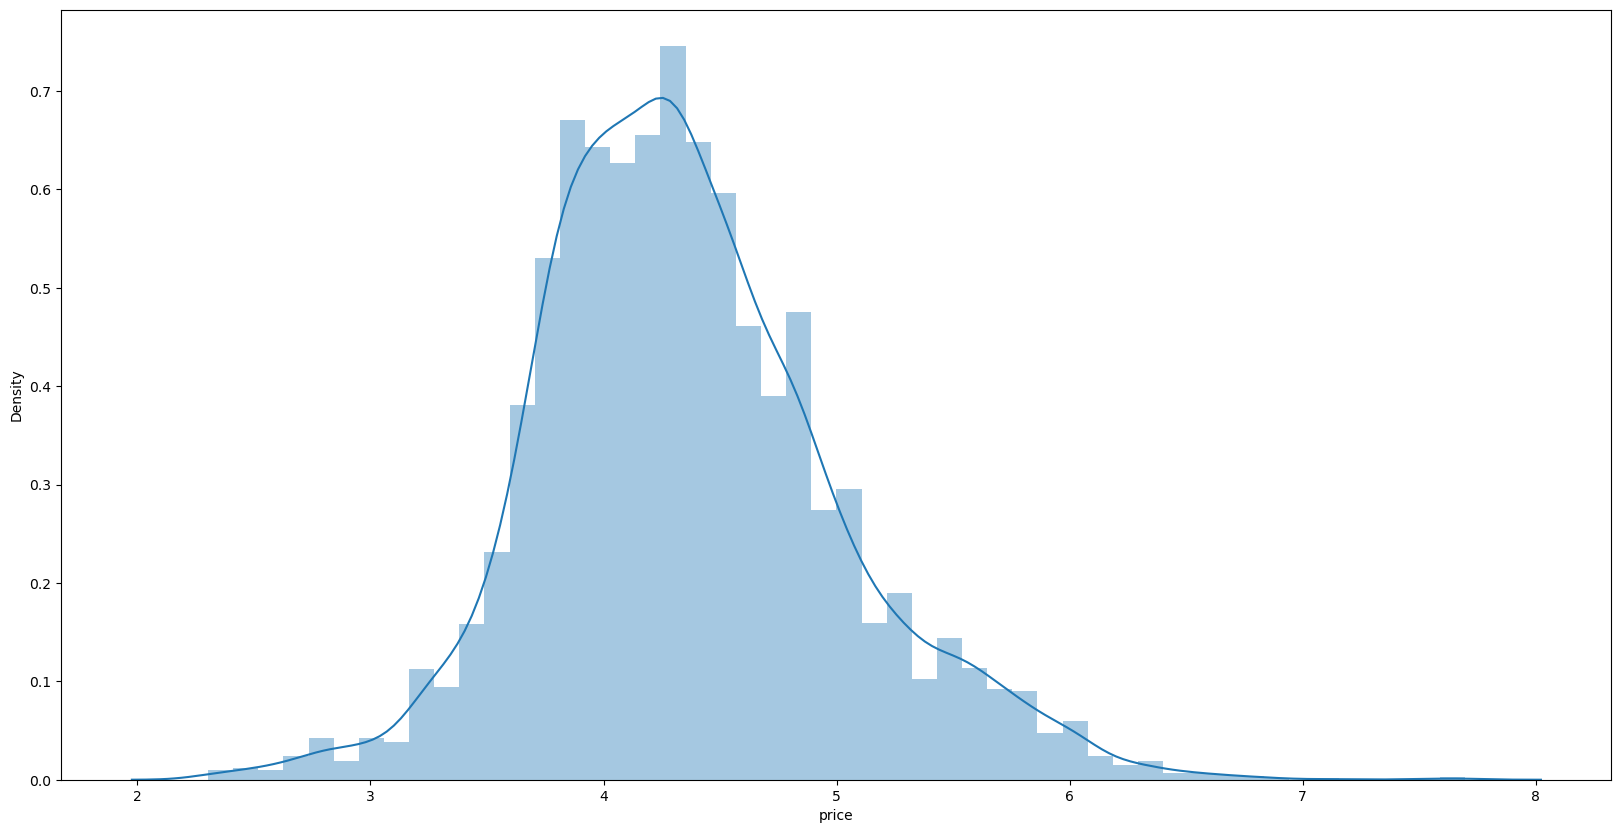

In [391]:
 
import seaborn as sns
sns.distplot(np.log(df7['price']))

In [392]:
df7.location.value_counts()

Other_loc                1190
Whitefield                249
Sarjapur  Road            191
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
Konanakunte                 7
BEML Layout                 7
ITPL                        6
Poorna Pragna Layout        6
Doddakallasandra            6
Name: location, Length: 224, dtype: int64

In [393]:
dummies=pd.get_dummies(df6["location"],drop_first=True)

In [394]:
df7=pd.concat([df7,dummies.drop("Other_loc",axis="columns")],axis="columns")
df7

,location,total_sqft,bath,price,bhk,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1st Phase JP Nagar,1875.0,3.0,167.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1500.0,5.0,85.0,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2065.0,4.0,210.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2059.0,3.0,225.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,1394.0,2.0,100.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10284,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10286,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10288,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10289,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [420]:
x=df7.drop(["price","location"],axis="columns")
y=df7['price']

In [421]:
x.dropna(inplace=True)
y.dropna(inplace=True)

In [422]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler

In [423]:
from sklearn.linear_model import LinearRegression
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8892160098829345


In [424]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_rf))

0.8087484293776144


In [425]:
def predict(location,sqft,bath,bhk):
    print("Location:", location)
    print("Columns:", x.columns)  # Check if columns are present in the DataFrame x

    l_index = np.where(x.columns == location)[0][0]
    l_index=np.where(x.columns==location)[0][0]
    x1=np.zeros(len(x.columns))
    x1[0]=sqft
    x1[1]=bath
    x1[2]=bhk
    if l_index>=0:
        x1[l_index]=1
    return lr.predict([x1])[0]

In [430]:
predict("Yeshwanthpur",1650,3,3)

Location: Yeshwanthpur
Columns: Index(['total_sqft', 'bath', 'bhk', '2nd Phase Judicial Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       ...
       'Vasanthapura', 'Vidyaranyapura', 'Vijayanagar', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=225)


D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


113.87731597321708